# Spam mail Classification using NLP techniques with NLTK and Scikit-learn


In this notebook, you will be getting an idea, 
 1. How to  Started With Natural Language Processing in Python
 2. Text Cleaning techniques(Remove punctuations and  stopwords,)
 3. How to apply the stemming and tokenization to the text
 4. Create the features to develop the ML model
 5. Apply Logistic Regression, SVM, Decision Trees, Random Forest, XG boosting.


Load the Dataset

The data set we will be using comes from the UCI Machine Learning Repository. It contains over 5000 SMS labeled messages, 
That have been collected for mobile phone spam research. It can be downloaded from the following URL:

https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [439]:
import pandas as pd
import numpy as np
import sklearn as skl
import nltk
import warnings
warnings.filterwarnings("ignore")


In [202]:
#Read the data set
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [203]:
#Drop last three columns
df=df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],axis=1)

In [204]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [205]:
# Change the header of the column
df = df.rename(columns={"v1":"label", "v2":"text"})

In [206]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [207]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Figure size 2160x1440 with 0 Axes>

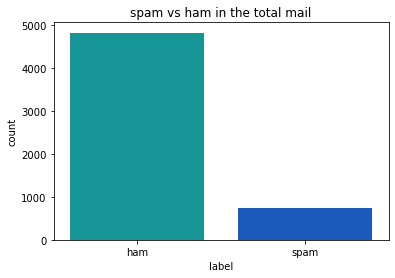

<Figure size 2160x1440 with 0 Axes>

In [208]:
sns.countplot('label',data=df,palette='winter_r')
plt.title('spam vs ham in the total mail')
plt.figure(figsize=(30,20))

In [405]:
#Change the label to Zeros and ones using labels encoding techniques
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
df['label'].shape

(5572,)

In [210]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [442]:
#Checking the maximum length of text
print("data set contain" +" " + str(len(df['text']))+" "+ "Observation")


data set contain 5572 Observation


In [212]:
# Creatted the length of each observation
df['length']=df['text'].apply(len)
print(df.head())

   label                                               text  length
0      0  Go until jurong point, crazy.. Available only ...     111
1      0                      Ok lar... Joking wif u oni...      29
2      1  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      0  U dun say so early hor... U c already then say...      49
4      0  Nah I don't think he goes to usf, he lives aro...      61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000163F2275708>,
      dtype=object)

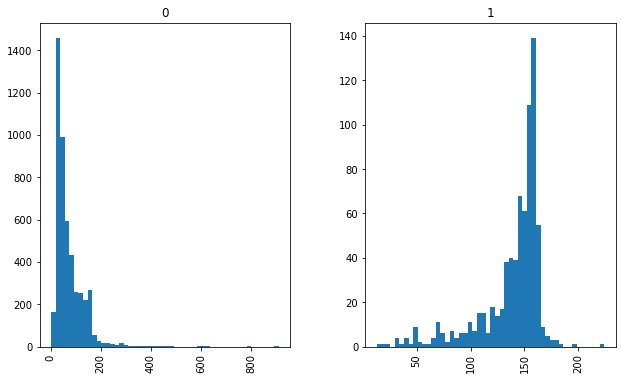

In [213]:
#Visiualization of the spam and ham 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df.hist(column='length', by='label', bins=50,figsize=(10,6))
#plt.title('length of mail')

In [214]:
# store the text
text= df['text']
print(text[:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: text, dtype: object


# Clean the text and and preprocessing

##### Use regular expressions to replace email addresses, URLs, phone numbers, other numbers. 
Text preprocessing, tokenizing and filtering of stopwords are included in a high-level component that can build a dictionary of features and transform documents to feature vectors. So, we have to remove the stop words to improve the analytics.

Get more clarification about the regular expression please click the link.
https://docs.python.org/3/library/re.html

Stemming and lemmatization
For grammatical reasons, documents are going to use different forms of a word, such as organize, organizes, and organizing. Additionally, there are families of derivationally related words with similar meanings, such as democracy, democratic, and democratization. In many situations, it seems as if it would be useful for a search for one of these words to return documents that contain another word in the set.

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

am, are, is ~ be
car, cars, car's, cars' ~ car
The result of this mapping of text will be something like:
the boy's cars are different colors $\Rightarrow$
the boy car be differ color

In [215]:
# Replace email addresses with 'email'
processed = text.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

import re #Regular expression library

#Download the English stopwords from nltk library
nltk.download('stopwords')

from nltk.corpus import stopwords

# Apply the stemming process to the text
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', processed[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [217]:
#Data cleaning and preprocessing
import re
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', processed[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ragav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
print(corpus)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'search right word thank breather promis wont 

## Generating Features 

In text analysis words are our features which are presented in the text coloumn.So, from our text we tokenize 
each observation  and generate the word corpus.


In [389]:
from nltk.tokenize import word_tokenize
all_word= []
for i in corpus:
    words = word_tokenize(i)
    for ii in words:
        all_word.append(ii)

all_word2 = nltk.FreqDist(all_word)

print('Most common words: {}'.format(all_word2.most_common(15)))


Most common words: [('u', 1212), ('call', 693), ('go', 459), ('get', 457), ('ur', 385), ('gt', 318), ('lt', 316), ('come', 302), ('ok', 292), ('day', 291), ('free', 288), ('know', 274), ('love', 260), ('like', 259), ('time', 253)]


In [393]:
print("Length of all word is" + " " + str(len(all_word)))

Length of all word is 50014


In [438]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
wc=WordCloud()
#word_cloud=wc.generate(all_word)


In [276]:
from collections import Counter
count_word=Counter(all_word)
print(count_word)

Counter({'u': 1212, 'call': 693, 'go': 459, 'get': 457, 'ur': 385, 'gt': 318, 'lt': 316, 'come': 302, 'ok': 292, 'day': 291, 'free': 288, 'know': 274, 'love': 260, 'like': 259, 'time': 253, 'got': 252, 'want': 246, 'good': 246, 'text': 232, 'send': 213, 'txt': 195, 'need': 189, 'p': 188, 'one': 184, 'today': 181, 'n': 174, 'take': 173, 'see': 172, 'r': 171, 'stop': 171, 'home': 167, 'think': 166, 'repli': 164, 'lor': 162, 'k': 160, 'sorri': 160, 'tell': 158, 'still': 157, 'mobil': 156, 'back': 153, 'da': 152, 'make': 148, 'dont': 144, 'phone': 142, 'week': 141, 'say': 139, 'pleas': 139, 'hi': 138, 'new': 136, 'work': 135, 'pl': 135, 'later': 135, 'hope': 133, 'ask': 133, 'co': 131, 'miss': 131, 'msg': 130, 'min': 129, 'meet': 128, 'c': 126, 'messag': 125, 'dear': 125, 'night': 122, 'wait': 121, 'happi': 120, 'well': 119, 'thing': 117, 'great': 116, 'much': 116, 'claim': 115, 'oh': 114, 'tri': 114, 'give': 114, 'wat': 113, 'hey': 112, 'number': 110, 'na': 109, 'b': 108, 'friend': 107, '

In [454]:
# use the 2000 most common words as features
word_features = list(all_word2.keys())[:2000]

print("The most 2000 common words are : " + str(word_features))


The most 2000 common words are : ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'free', 'entri', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', 'st', 'may', 'text', 'receiv', 'question', 'std', 'txt', 'rate', 'c', 'appli', 'dun', 'say', 'earli', 'hor', 'alreadi', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'freemsg', 'hey', 'darl', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'xxx', 'chg', 'send', 'rcv', 'even', 'brother', 'speak', 'treat', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', 'copi', 'friend', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'code', 'kl', 'valid', 'hour', 'mobil', 'month', 'r', 'entitl', 'updat', 'latest', 'colour', 'camera', 'co', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'a

In [416]:
# The find_features function will determine which of the 1500 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

In [449]:
# Now lets do it for all the messages
messages = zip(corpus, df['label'])
np.random.seed = 1
#np.random.shuffle(messages)

# Feed the message in to the find_features
feature_set = [(find_features(text), label) for (text, label) in messages]

### Create the Training and Testing data set

In [448]:
# we can split the feature_set into training and testing data as using sklearn
from sklearn import model_selection
training, testing = model_selection.train_test_split(feature_set, test_size = 0.25, random_state=2)
print("Training data set contain " + " " + str(len(training))+ " "+ "Observation")
print("Testing data set contain  " + " " + str(len(testing))+ " "+ "Observation")

Training data set contain  4179 Observation
Testing data set contain   1393 Observation


### Create the Classification models and finally check the all model accuracy

In [434]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 98.56424982053123


In [436]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [440]:
# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 93.25197415649676
Decision Tree Accuracy: 97.4156496769562
Random Forest Accuracy: 97.70279971284997
Logistic Regression Accuracy: 98.85139985642498
SGD Classifier Accuracy: 97.91816223977028
Naive Bayes Accuracy: 98.85139985642498
SVM Linear Accuracy: 98.56424982053123


### Conclusion

In [ ]:
In this notebook, You learnt how to apply classification algorithm. which are listed above.From the model SVM, logistic regression and 
naive Bayes algorithm gave better accuracy because these models worked the base on the Bayesian probability.
